In [17]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression



## difference between randn and rand?

https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

numpy.random.randn generates samples from the normal distribution, 
while numpy.random.rand from unifrom (in range [0,1))

1) Normal distribution. Where mean is 0 and var = sqrt(2. / (in + out)), where in - is the number of inputs to the neurons and out - number of outputs.

2)Unifrom distribution in range [-sqrt(6. / (in + out)), +sqrt(6. / (in + out))]

In [30]:
x = np.random.randn(100,1) 
x

array([[-0.26431415],
       [ 0.09585938],
       [ 0.93711356],
       [ 0.62632342],
       [-1.29945636],
       [-0.11512312],
       [ 2.47254688],
       [ 0.5266342 ],
       [ 1.25029114],
       [-0.69758158],
       [ 0.4483107 ],
       [-1.54703525],
       [ 0.01897964],
       [ 0.44057441],
       [ 1.42529021],
       [ 0.35445399],
       [-1.14244895],
       [-0.930109  ],
       [ 0.49848767],
       [ 1.32460995],
       [ 0.25006765],
       [ 0.69879074],
       [ 0.30904499],
       [ 0.17486817],
       [ 1.96888847],
       [-0.68501634],
       [ 0.14348102],
       [ 0.09854005],
       [-1.57288871],
       [ 2.03610948],
       [ 1.17882496],
       [-1.58705352],
       [-0.67791057],
       [ 1.54257627],
       [ 0.80392969],
       [-0.34958893],
       [ 0.256224  ],
       [ 1.20628379],
       [-2.20645444],
       [ 0.452114  ],
       [ 1.00037883],
       [-1.12399284],
       [ 0.08778235],
       [-2.13251959],
       [-0.73273754],
       [ 0

In [32]:
y = 2*x + 3 + 0.1*np.random.randn(100,1)
y

array([[ 2.63412029e+00],
       [ 3.17337060e+00],
       [ 4.90506495e+00],
       [ 4.20765480e+00],
       [ 5.21575020e-01],
       [ 2.58876900e+00],
       [ 7.81836975e+00],
       [ 4.03022428e+00],
       [ 5.54241566e+00],
       [ 1.61476190e+00],
       [ 3.87975755e+00],
       [-6.35096649e-02],
       [ 3.02430276e+00],
       [ 3.92032722e+00],
       [ 5.78531660e+00],
       [ 3.89328354e+00],
       [ 8.29149244e-01],
       [ 1.20176945e+00],
       [ 4.09489938e+00],
       [ 5.42788288e+00],
       [ 3.53090685e+00],
       [ 4.37562482e+00],
       [ 3.57026542e+00],
       [ 3.36662427e+00],
       [ 6.81328798e+00],
       [ 1.57599577e+00],
       [ 3.38950216e+00],
       [ 3.21381653e+00],
       [-2.39915646e-01],
       [ 7.14371461e+00],
       [ 5.18240983e+00],
       [-4.17691638e-03],
       [ 1.56759117e+00],
       [ 6.06348812e+00],
       [ 4.56694445e+00],
       [ 2.24610882e+00],
       [ 3.60961268e+00],
       [ 5.43398072e+00],
       [-1.3

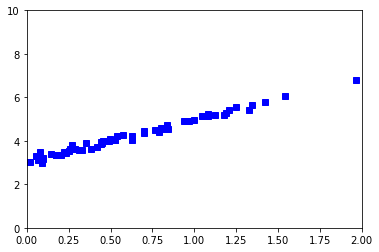

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'bs') # first character is the color( r for red, g for green etc), 2nd charactor is the style(o, -, s, ^)

#plt.plot default style is line, but if adding the 'bs', it becomes scatter

plt.axis([0, 2, 0, 10]) #he axis() command in the example above takes a list of [xmin, xmax, ymin, ymax] 
plt.show()

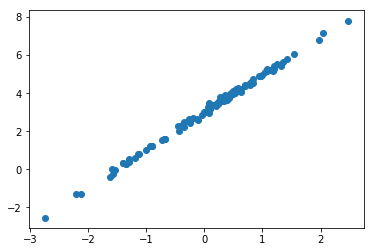

In [34]:
plt.scatter(x,y)
plt.show()

In [35]:
model = LinearRegression(fit_intercept=True) #fit_intercept=True
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
model.coef_

array([[1.97774344]])

In [37]:
model.intercept_

array([3.00383792])

In [39]:
model.predict(20)

array([[42.5587067]])

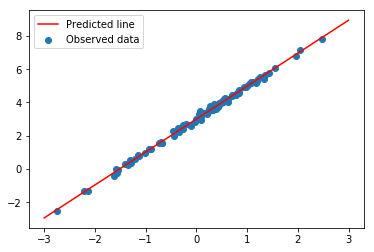

In [41]:
x_test = np.linspace(-3, 3)
y_pred = model.predict(x_test[:, None])#[:, None]??

plt.scatter(x,y)
plt.plot(x_test, y_pred, 'r-')
plt.legend(['Predicted line','Observed data' ])
plt.show()

# A more complicated function

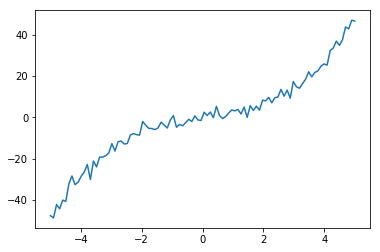

In [42]:
x = np.linspace(-5, 5, num=100)[:, None] #[:, None]??
y = -0.5 + 2.2*x + 0.3*x**3 + 2*np.random.randn(100,1)

plt.plot(x, y)
plt.show()

In [44]:
x_new = np.hstack([x, x**2, x**3, x**4])
x_new.shape

(100, 4)

In [45]:
model = LinearRegression()
model.fit(x_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
model.coef_

array([[ 2.2127234 , -0.13297831,  0.29886042,  0.00476887]])

In [47]:
model.intercept_

array([0.15440142])

In [48]:
y_pred = model.predict(x_new)

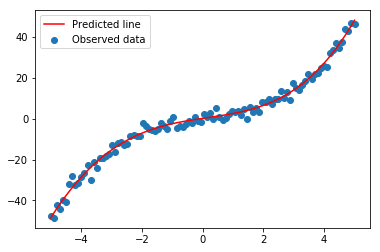

In [50]:
plt.scatter(x, y)
plt.plot(x_new[:, 0], y_pred, 'r')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=False)
x_new2 = poly.fit_transform(x)
x_new2[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])